In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from sklearn.metrics import roc_curve, auc, confusion_matrix
import pandas as pd
import seaborn as sns

In [14]:
# Load the training history for each fold
history_fold1 = pd.read_csv("GLCM_AMS_Result/fold_1_history.csv")  # Replace with actual path
history_fold2 = pd.read_csv("GLCM_AMS_Result/fold_2_history.csv")  # Replace with actual path
history_fold3 = pd.read_csv("GLCM_AMS_Result/fold_3_history.csv")  # Replace with actual path
history_fold4 = pd.read_csv("GLCM_AMS_Result/fold_4_history.csv")  # Replace with actual path
history_fold5 = pd.read_csv("GLCM_AMS_Result/fold_5_history.csv")  # Replace with actual path
history_fold6 = pd.read_csv("GLCM_AMS_Result/fold_6_history.csv")  # Replace with actual path
history_fold7 = pd.read_csv("GLCM_AMS_Result/fold_7_history.csv")  # Replace with actual path
history_fold8 = pd.read_csv("GLCM_AMS_Result/fold_8_history.csv")  # Replace with actual path
history_fold9 = pd.read_csv("GLCM_AMS_Result/fold_9_history.csv")  # Replace with actual path
history_fold10 = pd.read_csv("GLCM_AMS_Result/fold_10_history.csv")  # Replace with actual path

# Load confusion matrix data for each fold
cm_data_fold1 = pd.read_csv("GLCM_AMS_Result/fold_1_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold2 = pd.read_csv("GLCM_AMS_Result/fold_2_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold3 = pd.read_csv("GLCM_AMS_Result/fold_3_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold4 = pd.read_csv("GLCM_AMS_Result/fold_4_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold5 = pd.read_csv("GLCM_AMS_Result/fold_5_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold6 = pd.read_csv("GLCM_AMS_Result/fold_6_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold7 = pd.read_csv("GLCM_AMS_Result/fold_7_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold8 = pd.read_csv("GLCM_AMS_Result/fold_8_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold9 = pd.read_csv("GLCM_AMS_Result/fold_9_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold10 = pd.read_csv("GLCM_AMS_Result/fold_10_confusion_matrix_data.csv")  # Replace with actual path

# Load the roc_auc values for each fold
with open("GLCM_AMS_Result/all_val_auc.json", "r") as f:
    all_val_auc = json.load(f)

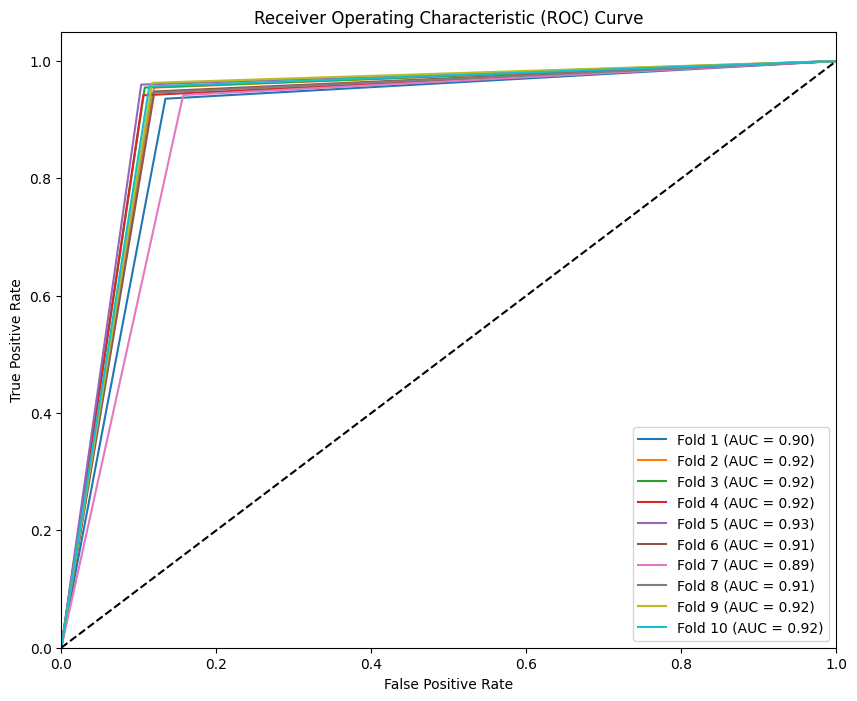

In [15]:
plt.figure(figsize=(10, 8))
for fold in range(10):  # Assuming 10 folds
    # Use the correct confusion matrix data for each fold
    cm_data = pd.read_csv(f"GLCM_AMS_Result/fold_{fold + 1}_confusion_matrix_data.csv")
    fpr, tpr, _ = roc_curve(cm_data["true_labels"], cm_data["predicted_labels"])  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Fold {fold + 1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# find the average of the validation AUCs
average_val_auc = np.mean(all_val_auc[0])
print(f"Average validation AUC: {average_val_auc}")


Average validation AUC: 0.9498573281697921


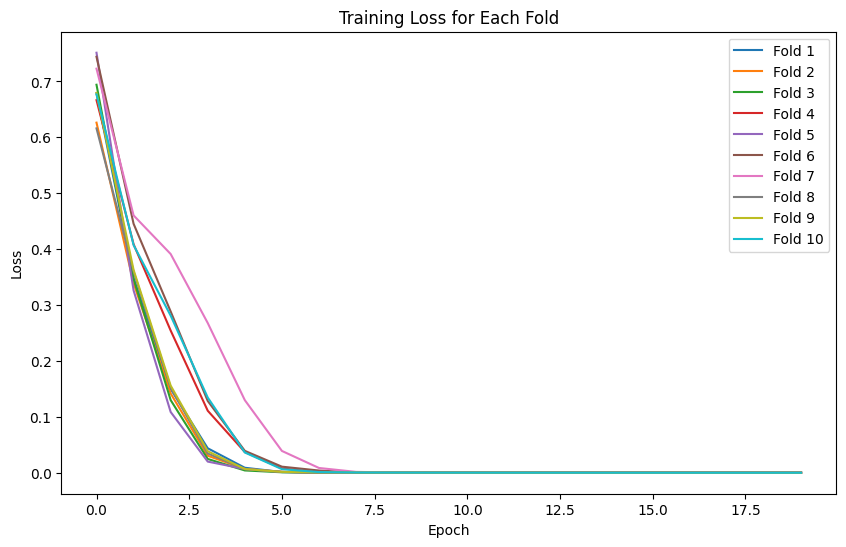

In [22]:
# Plot the training history for each fold
plt.figure(figsize=(10, 6))
plt.plot(history_fold1["train_loss"], label="Fold 1")
plt.plot(history_fold2["train_loss"], label="Fold 2")
plt.plot(history_fold3["train_loss"], label="Fold 3")
plt.plot(history_fold4["train_loss"], label="Fold 4")
plt.plot(history_fold5["train_loss"], label="Fold 5")
plt.plot(history_fold6["train_loss"], label="Fold 6")
plt.plot(history_fold7["train_loss"], label="Fold 7")
plt.plot(history_fold8["train_loss"], label="Fold 8")
plt.plot(history_fold9["train_loss"], label="Fold 9")
plt.plot(history_fold10["train_loss"], label="Fold 10")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss for Each Fold")
plt.legend()
plt.show()


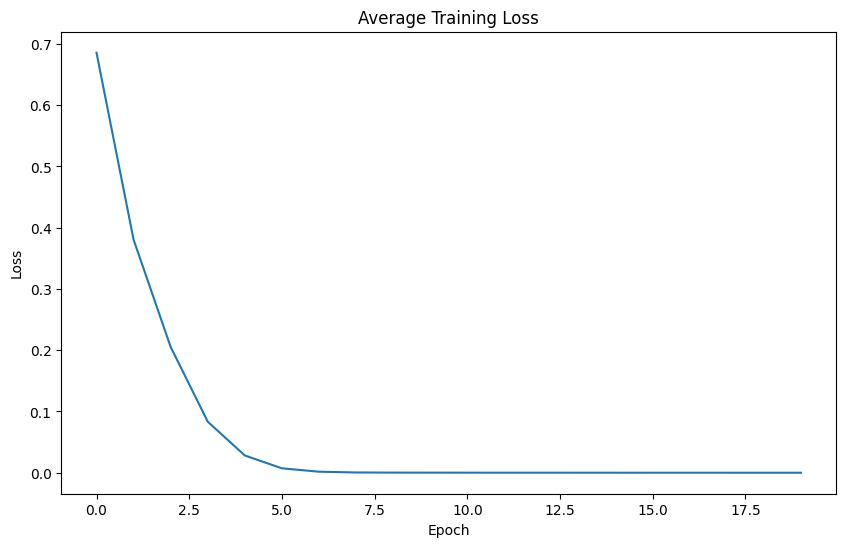

In [24]:
# plot average training loss
train_loss = np.mean([history_fold1["train_loss"], history_fold2["train_loss"], history_fold3["train_loss"],
                      history_fold4["train_loss"], history_fold5["train_loss"], history_fold6["train_loss"],
                      history_fold7["train_loss"], history_fold8["train_loss"], history_fold9["train_loss"],
                      history_fold10["train_loss"]], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Average Training Loss")
plt.show()

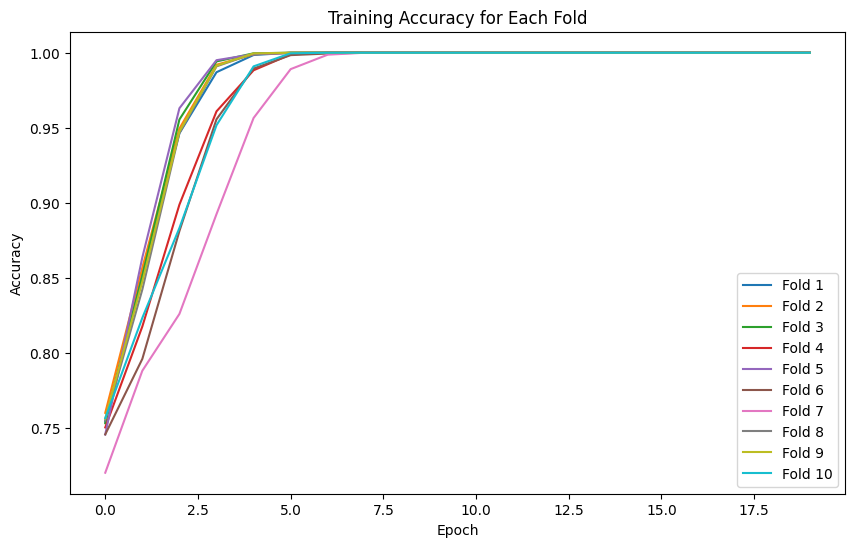

In [26]:
# plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_fold1["train_acc"], label="Fold 1")
plt.plot(history_fold2["train_acc"], label="Fold 2")
plt.plot(history_fold3["train_acc"], label="Fold 3")
plt.plot(history_fold4["train_acc"], label="Fold 4")
plt.plot(history_fold5["train_acc"], label="Fold 5")
plt.plot(history_fold6["train_acc"], label="Fold 6")
plt.plot(history_fold7["train_acc"], label="Fold 7")
plt.plot(history_fold8["train_acc"], label="Fold 8")
plt.plot(history_fold9["train_acc"], label="Fold 9")
plt.plot(history_fold10["train_acc"], label="Fold 10")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy for Each Fold")
plt.legend()
plt.show()


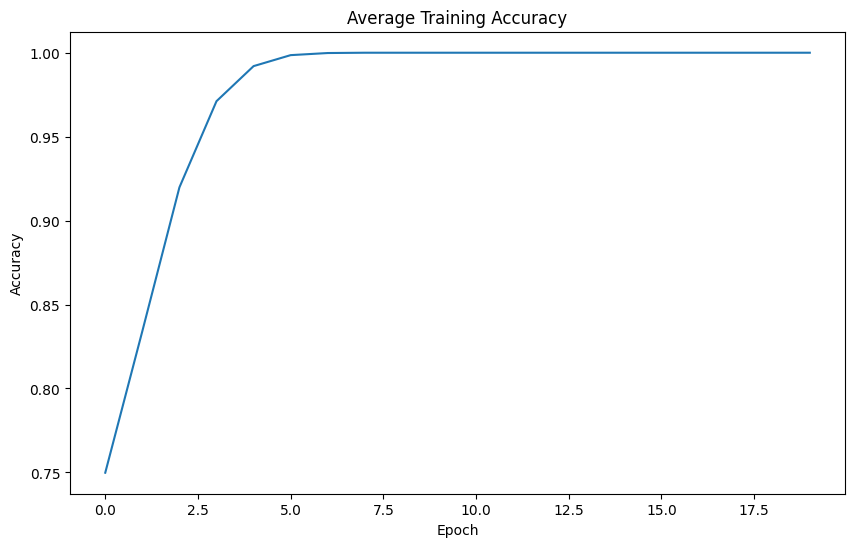

In [27]:
# find average training accuracy
train_acc = np.mean([history_fold1["train_acc"], history_fold2["train_acc"], history_fold3["train_acc"],
                     history_fold4["train_acc"], history_fold5["train_acc"], history_fold6["train_acc"],
                     history_fold7["train_acc"], history_fold8["train_acc"], history_fold9["train_acc"],
                     history_fold10["train_acc"]], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(train_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Average Training Accuracy")
plt.show()